In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv('../Data/Modeling/character-predictions-modeling-encoded.csv')

GMM

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


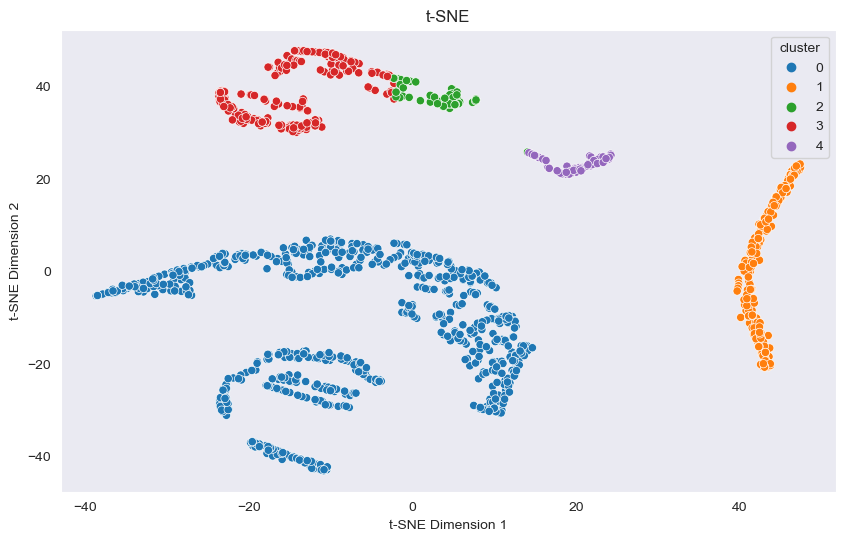

In [3]:

tsne = TSNE(n_components=2, random_state=123)
tsne_results = tsne.fit_transform(df)

# plt.figure(figsize=(10, 6))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue', alpha=0.5)
# plt.title('t-SNE')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.grid()
# plt.show()

kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['cluster'], palette='tab10', legend='full')


plt.title('t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()
plt.show()

In [ ]:
tsne = TSNE(n_components=2, random_state=123)
tsne_results = tsne.fit_transform(df)

gmm = GaussianMixture(n_components=5, random_state=123)
gmm.fit(df)
df['cluster'] = gmm.predict(df)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['cluster'], palette='tab10', legend='full')

plt.title('t-SNE with GMM clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()
plt.show()

Analiza wyników

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting bat

+----+-----------------+--------------------+---------------------------+------------------------+
|    | Model           |   Silhouette Score |   Calinski-Harabasz Index |   Davies-Bouldin Index |
+====+=================+====================+===========================+========================+
|  0 | KMeans          |          0.784547  |                   4701.43 |              0.459363  |
+----+-----------------+--------------------+---------------------------+------------------------+
|  1 | DBSCAN          |          0.0338995 |                 285646    |              0.0328595 |
+----+-----------------+--------------------+---------------------------+------------------------+
|  2 | MiniBatchKMeans |          0.784664  |                   4701.55 |              0.457666  |
+----+-----------------+--------------------+---------------------------+------------------------+
|  3 | GMM             |          0.784547  |                   4701.43 |              0.459363  |
+----+----

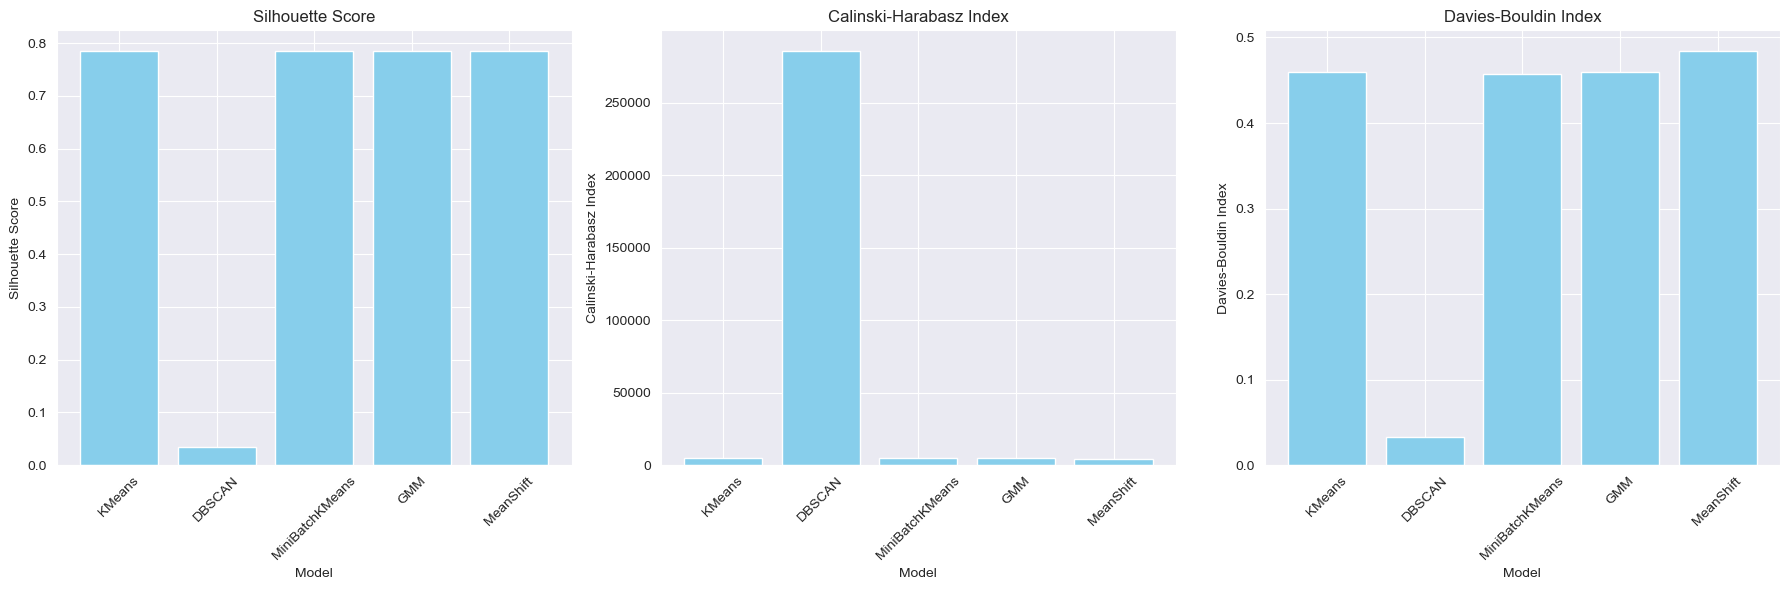

In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate


kmeans = KMeans(n_clusters=5, random_state=123)
dbscan = DBSCAN(eps=1.0, min_samples=1)
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=123)
gmm = GaussianMixture(n_components=5, random_state=123)
meanshift = MeanShift()

models = {
    "KMeans": kmeans,
    "DBSCAN": dbscan,
    "MiniBatchKMeans": minibatch_kmeans,
    "GMM": gmm,
    "MeanShift": meanshift
}

results = []

for name, model in models.items():
    if name == "GMM":
        labels = model.fit_predict(df)
    else:
        model.fit(df)
        labels = model.labels_
    
    if name == "DBSCAN":
        unique_labels = set(labels)
        unique_labels.discard(-1)
        if len(unique_labels) > 1:
            labels = labels[labels != -1]
            df_filtered = df[labels != -1]
            silhouette_avg = silhouette_score(df_filtered, labels)
            calinski_harabasz = calinski_harabasz_score(df_filtered, labels)
            davies_bouldin = davies_bouldin_score(df_filtered, labels)
        else:
            silhouette_avg = np.nan
            calinski_harabasz = np.nan
            davies_bouldin = np.nan
    else:
        if len(np.unique(labels)) > 1:
            silhouette_avg = silhouette_score(df, labels)
            calinski_harabasz = calinski_harabasz_score(df, labels)
            davies_bouldin = davies_bouldin_score(df, labels)
        else:
            silhouette_avg = np.nan
            calinski_harabasz = np.nan
            davies_bouldin = np.nan
    
    results.append([name, silhouette_avg, calinski_harabasz, davies_bouldin])

columns = ["Model", "Silhouette Score", "Calinski-Harabasz Index", "Davies-Bouldin Index"]
results_df = pd.DataFrame(results, columns=columns)

print(tabulate(results_df, headers='keys', tablefmt='grid'))

metrics = ["Silhouette Score", "Calinski-Harabasz Index", "Davies-Bouldin Index"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    axes[i].bar(results_df['Model'], results_df[metric], color='skyblue')
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate

kmeans = KMeans(n_clusters=10, random_state=123)
dbscan = DBSCAN(eps=1.0, min_samples=1)
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, random_state=123)
gmm = GaussianMixture(n_components=10, random_state=123)
meanshift = MeanShift()

models = {
    "KMeans": kmeans,
    "DBSCAN": dbscan,
    "MiniBatchKMeans": minibatch_kmeans,
    "GMM": gmm,
    "MeanShift": meanshift
}

results = []

for name, model in models.items():
    if name == "GMM":
        labels = model.fit_predict(df)
    else:
        model.fit(df)
        labels = model.labels_
    
    if name == "DBSCAN":
        unique_labels = set(labels)
        unique_labels.discard(-1)
        if len(unique_labels) > 1:
            labels = labels[labels != -1]
            df_filtered = df[labels != -1]
            silhouette_avg = silhouette_score(df_filtered, labels)
            calinski_harabasz = calinski_harabasz_score(df_filtered, labels)
            davies_bouldin = davies_bouldin_score(df_filtered, labels)
        else:
            silhouette_avg = np.nan
            calinski_harabasz = np.nan
            davies_bouldin = np.nan
    else:
        if len(np.unique(labels)) > 1: 
            silhouette_avg = silhouette_score(df, labels)
            calinski_harabasz = calinski_harabasz_score(df, labels)
            davies_bouldin = davies_bouldin_score(df, labels)
        else:
            silhouette_avg = np.nan
            calinski_harabasz = np.nan
            davies_bouldin = np.nan
    
    results.append([name, silhouette_avg, calinski_harabasz, davies_bouldin])

columns = ["Model", "Silhouette Score", "Calinski-Harabasz Index", "Davies-Bouldin Index"]
results_df = pd.DataFrame(results, columns=columns)

print(tabulate(results_df, headers='keys', tablefmt='grid'))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting bat

+----+-----------------+--------------------+---------------------------+------------------------+
|    | Model           |   Silhouette Score |   Calinski-Harabasz Index |   Davies-Bouldin Index |
+====+=================+====================+===========================+========================+
|  0 | KMeans          |          0.550867  |                   5660    |              0.652818  |
+----+-----------------+--------------------+---------------------------+------------------------+
|  1 | DBSCAN          |          0.0338995 |                 285646    |              0.0328595 |
+----+-----------------+--------------------+---------------------------+------------------------+
|  2 | MiniBatchKMeans |          0.546894  |                   5141.37 |              0.682588  |
+----+-----------------+--------------------+---------------------------+------------------------+
|  3 | GMM             |          0.143094  |                   2790.41 |              1.87399   |
+----+----